<a href="https://colab.research.google.com/github/Ultan-Kearns/ZTM-Tensorflow-Developer-Certificate/blob/master/02_Neural_Network_Classification_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network Classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification problem is where you try to classify a particular object

A few types of classification problems

* Binary classification
* Multiclass classification
* Multilabel classificaiton

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000
# Create circles
X,y = make_circles(n_samples,noise=0.03,random_state=42)

In [2]:
 # Check features
 X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now let's visualize it

In [4]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [5]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

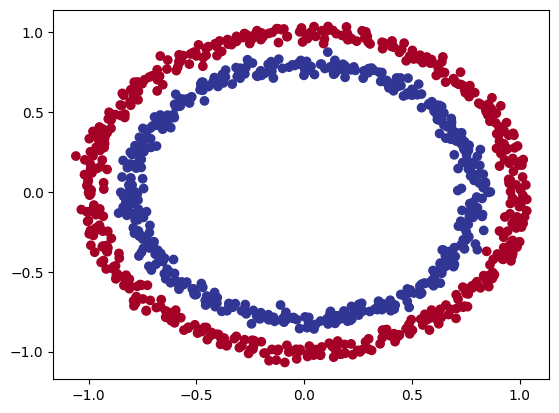

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

**Exercise**: Before pushing forward spend 10 mins playing around with TF playground building and running different neural networks.  See what happens when you change different hyper parameters

## Input and output shapes

In [7]:
# Check the shapes of our features and labels

X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [9]:
# View the first examples of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

## My model

In [10]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["accuracy"])
model.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 3s 5ms/step - loss: 0.6925 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6833 - accuracy: 0.5300
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6647 - accuracy: 0.5780
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6266 - accuracy: 0.6630
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5184 - accuracy: 0.8910
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.3650 - accuracy: 0.9530
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 0.2232 - accuracy: 0.9900
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 0.1569 - accuracy: 0.9880
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1005 - accuracy: 0.9960
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0801 - accuracy: 0.9950
Epoch 11/

## Steps in modelling

The steps in modelling with Tensorflow are typically:

1. Create the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [11]:
## Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

# fit the model
model_1.fit(X,y,epochs=200)

Epoch 1/200
32/32 [==============================] - 4s 5ms/step - loss: 5.2800 - accuracy: 0.4820
Epoch 2/200
32/32 [==============================] - 0s 5ms/step - loss: 5.1037 - accuracy: 0.4830
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 4.8180 - accuracy: 0.4820
Epoch 4/200
32/32 [==============================] - 0s 5ms/step - loss: 4.7177 - accuracy: 0.4790
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 4.6276 - accuracy: 0.4770
Epoch 6/200
32/32 [==============================] - 0s 5ms/step - loss: 4.5759 - accuracy: 0.4780
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 4.5842 - accuracy: 0.4760
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 4.5664 - accuracy: 0.4760
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 4.5656 - accuracy: 0.4760
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 4.5647 - accuracy: 0.4760
Epoch 11/

Since we're working on a binary classification problem the model has an accuracy of around 50% which makes it seem like the model is guessing....

In [12]:
tf.random.set_seed(42)

# Create a model with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model

model_2.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.SGD(),metrics=["accuracy"])

# fit the model

model_2.fit(X,y,epochs=100,verbose=0)

In [13]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add more layers, or increase the number of hidden units within a layer
2. Compiling a model - here we might want to choose a different optimization function such as Adam instead of SGD
3. Fitting a model - Perhaps we might fit our model for more epochs(longer training)

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (This time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

# finally fit the model
model_3.fit(X,y,epochs=100,verbose=0)

In [15]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5130


[0.6958003640174866, 0.5130000114440918]

Note: Whenever model is behaving strangely visualize, visualize, visualisze

To visualize our model's predictions, let's create a function `plot_decision_boundary`, this function will:

* Take in trained model, features(X) and labels(Y)
* Create a mesh grid of different X values
* Make predicitions across the meshgrid
* Plot the predictions as well as a line between zones(where each unique class falls)


In [16]:
# Let's see if the model can be used for a regression problem

tf.random.set_seed(42)

# create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X + 100

X_regression,y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [17]:
# Let's split our regression data into training and test sets

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

X_reg_train.ndim


1

We compiled our model for binary classifcation problem, but we are now working on a regression problem.  Let's change our model to suit our data

In [18]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (This time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])

# finally fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=(1)), # <- expand input dimensions
            y_reg_train,
            epochs=100)


Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 523.8633 - mae: 523.8633
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 433.6440 - mae: 433.6440
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 347.1262 - mae: 347.1262
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 257.2144 - mae: 257.2144
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 162.9695 - mae: 162.9695
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 64.5633 - mae: 64.5633
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 68.6359 - mae: 68.6359
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 80.5002 - mae: 80.5002
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 60.1757 - mae: 60.1757
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 45.4656 - mae: 45.4656
Epoch 11/100
5/5 [==============================]

2/2 [==============================] - 0s 9ms/step


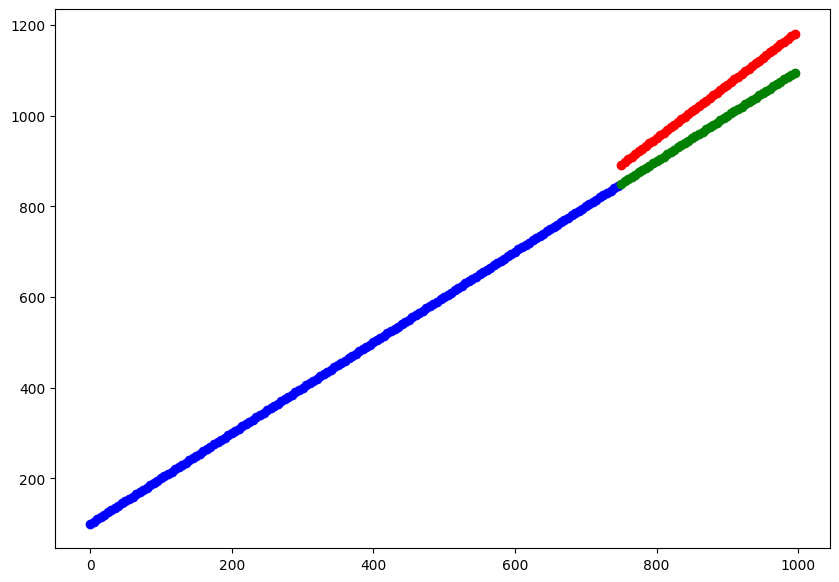

In [19]:
# Make predictions with trained model

y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train, c="b",label="Training data")
plt.scatter(X_reg_test,y_reg_test, c="g",label="Testing data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label="Predictions")

## The missing piece: Non-Linearity

In [20]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,tf.keras.activations.linear)
])

# Compile the model
model_4.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
history = model_4.fit(X,y,epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.1914 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1540 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1527 - accuracy: 0.4870
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1521 - accuracy: 0.4870
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1394 - accuracy: 0.4870
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1609 - accuracy: 0.4870
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1606 - accuracy: 0.4870
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1605 - accuracy: 0.4870
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1604 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1603 - accuracy: 0.4870
Epoch 11/

Let's try and build our first neural network with non-linear activation function

In [21]:
# Set the random seed
tf.random.set_seed(42)

# Create the model with non-linear activation function
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,tf.keras.activations.relu)
])

# Compile the model
model_5.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
history = model_5.fit(X,y,epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.4097 - accuracy: 0.4700
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3892 - accuracy: 0.4700
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3712 - accuracy: 0.4710
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3284 - accuracy: 0.4700
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2994 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2893 - accuracy: 0.4740
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2769 - accuracy: 0.4740
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2752 - accuracy: 0.4740
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2743 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2733 - accuracy: 0.4750
Epoch 11/

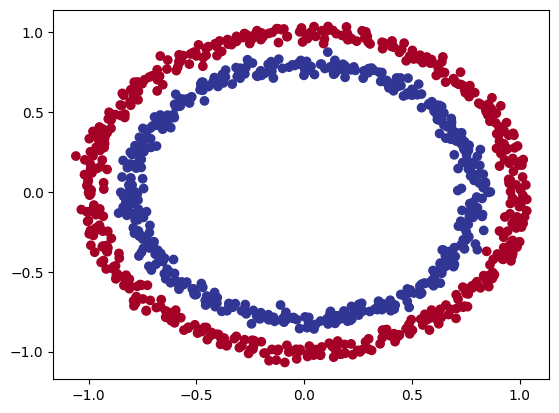

In [22]:
# Checkout data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [23]:

import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


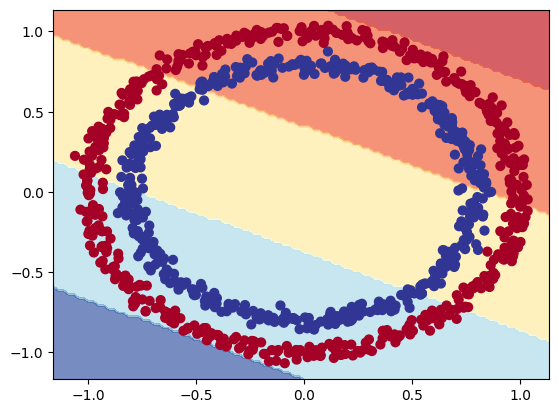

In [24]:
# check the decision boundary for latest model
plot_decision_boundary(model=model_4,X=X,y=y)

In [25]:
  x_min,x_max = X[:,0].min()-0.1, X[:,0] + 0.1
  y_min,y_max = X[:,1].min()-0.1, X[:,1] + 0.1
  x_min,x_max,y_min,y_max

(-1.1595024599098636,
 array([ 8.54246251e-01, -6.56158882e-01, -7.15391934e-01, -2.93730729e-01,
         5.42207645e-01, -3.79646368e-01,  8.63516405e-02,  8.71513274e-01,
        -6.93223397e-02, -2.14857961e-02, -5.42490416e-01,  6.69466604e-01,
        -1.77359106e-02,  8.34100038e-01,  7.00776333e-01,  2.90225707e-01,
        -8.36951846e-01,  2.07061696e-01, -7.18913619e-01, -5.42100130e-01,
         7.26827199e-01, -4.62291360e-01,  7.87333421e-02,  8.39770578e-01,
        -8.09048393e-01, -8.36994111e-01,  3.86615780e-01,  9.26260717e-01,
         3.53433397e-01,  7.57946255e-01, -2.14834779e-01, -1.23989601e-01,
         1.08443892e-01,  1.10503887e+00,  1.04841802e-02, -6.88574473e-01,
        -4.68205362e-01,  5.47646782e-01,  3.63260719e-01,  8.45020435e-01,
        -4.97118971e-01,  4.61928379e-01, -6.14242507e-01,  9.33839377e-01,
        -7.33981856e-01, -8.10860642e-01,  5.87625557e-01,  3.30736878e-01,
         8.58412791e-01, -3.12746839e-01,  5.76176622e-01,  1.3999

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


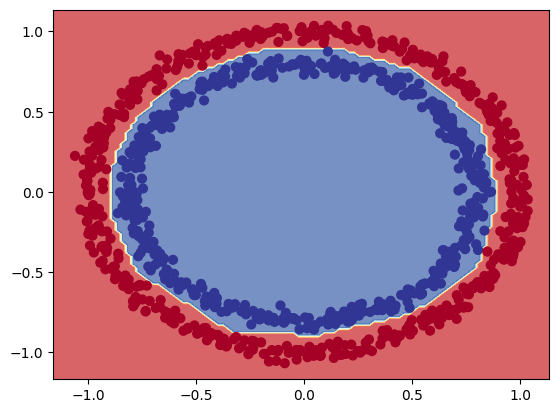

In [26]:
# Mapping my model

plot_decision_boundary(model=model,X=X,y=y)

In [27]:
# Time to replicate the multi layer neural network from TF playground in code

# set the random seed

tf.random.set_seed(42)

# Create the model

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. compile the model

model_6.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])

# 3. fit the model

history = model_6.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 4ms/step - loss: 3.0423 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 1.9406 - accuracy: 0.4590
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 0.9951 - accuracy: 0.4300
Epoch 4/250
32/32 [==============================] - 0s 4ms/step - loss: 0.9272 - accuracy: 0.4620
Epoch 5/250
32/32 [==============================] - 0s 4ms/step - loss: 0.8888 - accuracy: 0.4560
Epoch 6/250
32/32 [==============================] - 0s 4ms/step - loss: 0.8600 - accuracy: 0.4420
Epoch 7/250
32/32 [==============================] - 0s 4ms/step - loss: 0.8378 - accuracy: 0.4460
Epoch 8/250
32/32 [==============================] - 0s 4ms/step - loss: 0.8193 - accuracy: 0.4540
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8045 - accuracy: 0.4370
Epoch 10/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7915 - accuracy: 0.4200
Epoch 11/

In [28]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9900


[0.040341950953006744, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


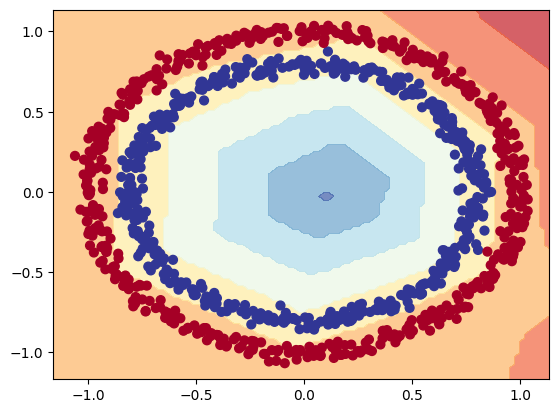

In [29]:
plot_decision_boundary(model=model_6,X=X,y=y)

In [30]:
# Time to replicate the multi layer neural network from TF playground in code

# set the random seed

tf.random.set_seed(42)

# Create the model

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. compile the model

model_7.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])

# 3. fit the model

history = model_7.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 4ms/step - loss: 0.6931 - accuracy: 0.4900
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5220
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5240
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5060
Epoch 5/250
32/32 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.5060
Epoch 6/250
32/32 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.4880
Epoch 7/250
32/32 [==============================] - 0s 5ms/step - loss: 0.6926 - accuracy: 0.5130
Epoch 8/250
32/32 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.5150
Epoch 9/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6923 - accuracy: 0.5190
Epoch 10/250
32/32 [==============================] - 0s 5ms/step - loss: 0.6921 - accuracy: 0.5180
Epoch 11/

In [31]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0905 - accuracy: 0.9780


[0.09054639935493469, 0.9779999852180481]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


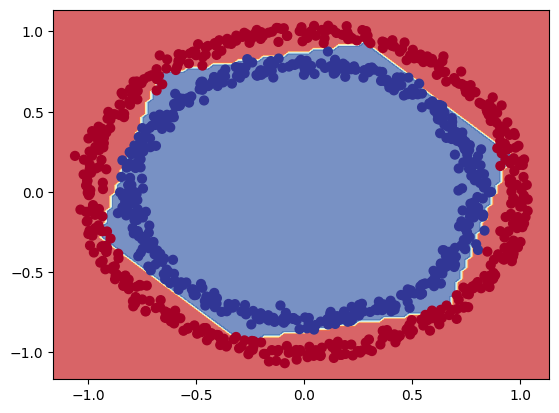

In [32]:
plot_decision_boundary(model=model_7,X=X,y=y)

The combination of **linear(straight lines) and non linear(non-straight lines) functions** is one of the key fundamentals of neural networks

Now we've discusssed the concept of linear and non-linear functions let's see them in action


In [33]:
# Create a toy tensor (similar to the data we passed into our model)

A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

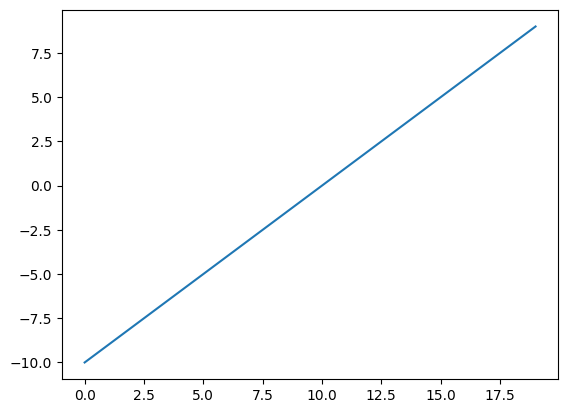

In [34]:
# Visualize our toy tensor
plt.plot(A)

In [35]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on toy tensor

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

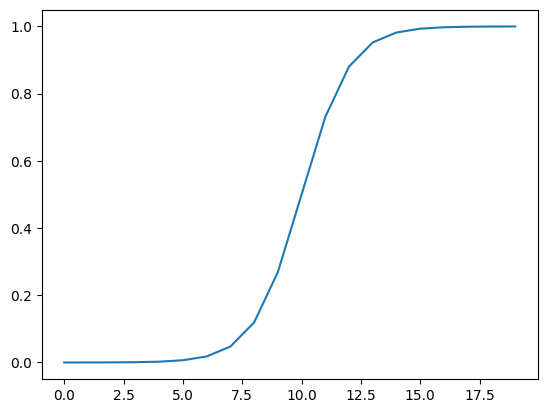

In [36]:
# Plot our toy tensor transformed by sigmoid

plt.plot(sigmoid(A))

In [37]:
# Let's do the same with relu
def relu(x):
  return tf.math.maximum(x,0)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

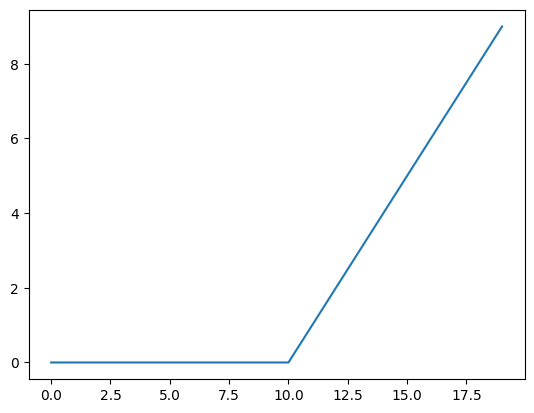

In [38]:
plt.plot(relu(A))

## Evaluating and imrpoving our classification model

So far we've been training and testing on the same dataset

However, in machine learning this is basically a sin.

So let's create a training and test set

In [39]:
# Check how many examples we have
len(X)

1000

In [40]:
X_train, y_train = X[:800],y[:800]
X_test,y_test = X[800:],y[800:]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [41]:
# Let's recreate a model to fit on training data and evaluate on test

# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["accuracy"])

history = model_8.fit(X_train,y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6917 - accuracy: 0.4963
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5688
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.5675
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6782 - accuracy: 0.6087
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6706 - accuracy: 0.6500
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6598 - accuracy: 0.5825
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6479 - accuracy: 0.6875
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6339 - accuracy: 0.6837
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6174 - accuracy: 0.6463
Epoch 10/25
25/25 [==============================] - 0s 4ms/step - loss: 0.5972 - accuracy: 0.6837
Epoch 11/25
25/25 [

In [42]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2299 - accuracy: 0.9500


[0.22989995777606964, 0.949999988079071]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


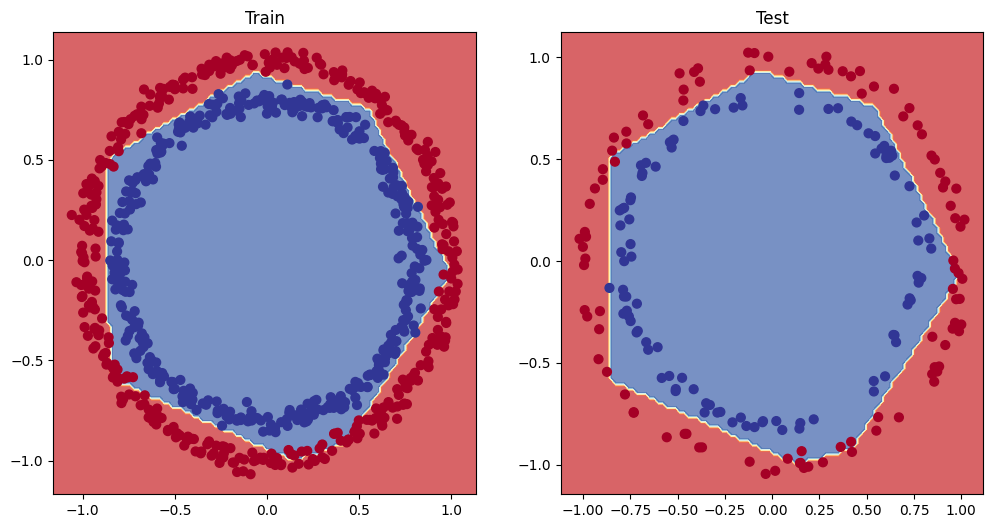

In [43]:
# Plot the decision boundaries for training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X=X_test,y=y_test)
plt.show()

## Plot the loss (or training) curves

In [44]:
# Convert history object to dataframe

pd.DataFrame(history.history)

,loss,accuracy
0,0.691705,0.49625
1,0.687479,0.56875
2,0.683083,0.56750
3,0.678249,0.60875
4,0.670645,0.65000
5,0.659807,0.58250
6,0.647950,0.68750
7,0.633901,0.68375
8,0.617434,0.64625
9,0.597191,0.68375


Text(0.5, 1.0, 'Model_8 loss curves')

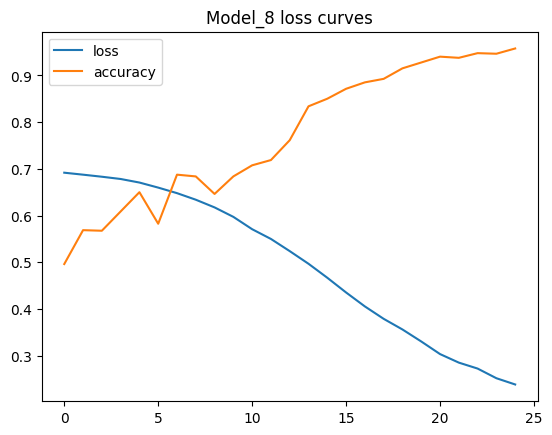

In [45]:
# plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

**Note:** For many problems the loss function going down means the model is improving the predictions it's making are getting closer to the ground truth labes

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps

- A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model *while* it's training

- Another model(we could use the same one as above, but we're practicing building models here.
- A modified loss curves plot

In [46]:
tf.random.set_seed(42)

# Create a model(same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_9.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
#Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch / 20));
history_9 = model_9.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.7063 - accuracy: 0.4850 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7060 - accuracy: 0.4825 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7056 - accuracy: 0.4825 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7052 - accuracy: 0.4825 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7048 - accuracy: 0.4837 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7045 - accuracy: 0.4837 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7040 - accuracy: 0.4863 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7035 - accuracy: 0.4837 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

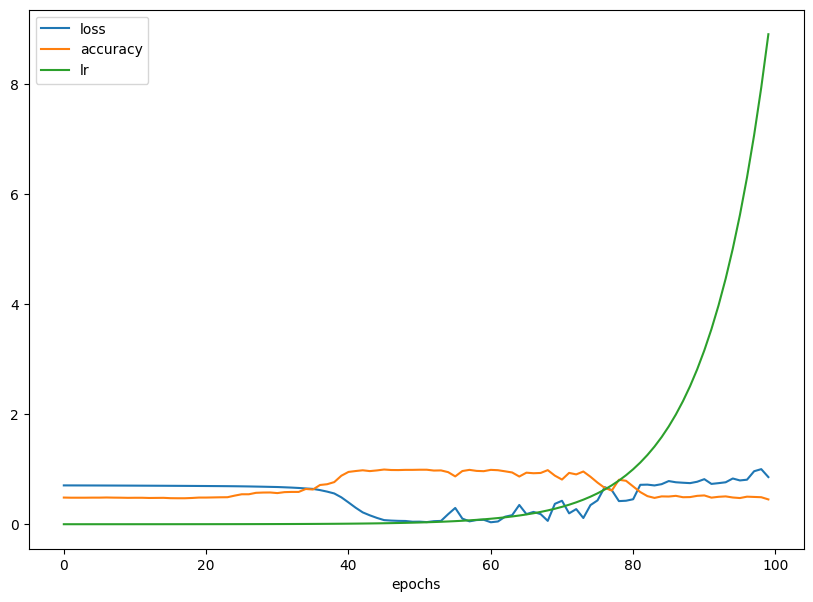

In [47]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs")

In [48]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10 **(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [49]:
len(lrs)

100

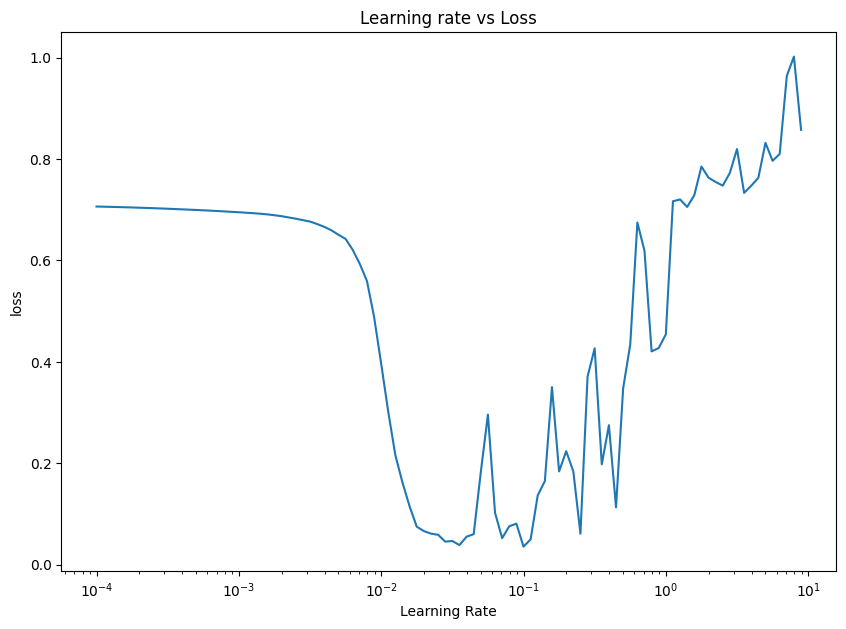

In [50]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("loss")
plt.title("Learning rate vs Loss")
plt.show()


In [51]:
# Example of other typical learning rate values are:
10 **0, 10 ** -1, 10 **-2, 10**-3,1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [60]:
tf.random.set_seed(42)

# Create a model(same as model_8)
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_10.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["accuracy"])
#Create a learning rate callback
history_10 = model_10.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5088
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5263
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5425
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.5875
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6699 - accuracy: 0.6513
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6559 - accuracy: 0.6037
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6372 - accuracy: 0.7588
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6131 - accuracy: 0.7400
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5754 - accuracy: 0.7837
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5322 - accuracy: 0.8150
Epoch 11/

In [61]:
# evaluate model 10 on testing data
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0570 - accuracy: 0.9750


[0.05700648948550224, 0.9750000238418579]

In [62]:
# evaluate model 8 on testing data
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2299 - accuracy: 0.9500


[0.22989995777606964, 0.949999988079071]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


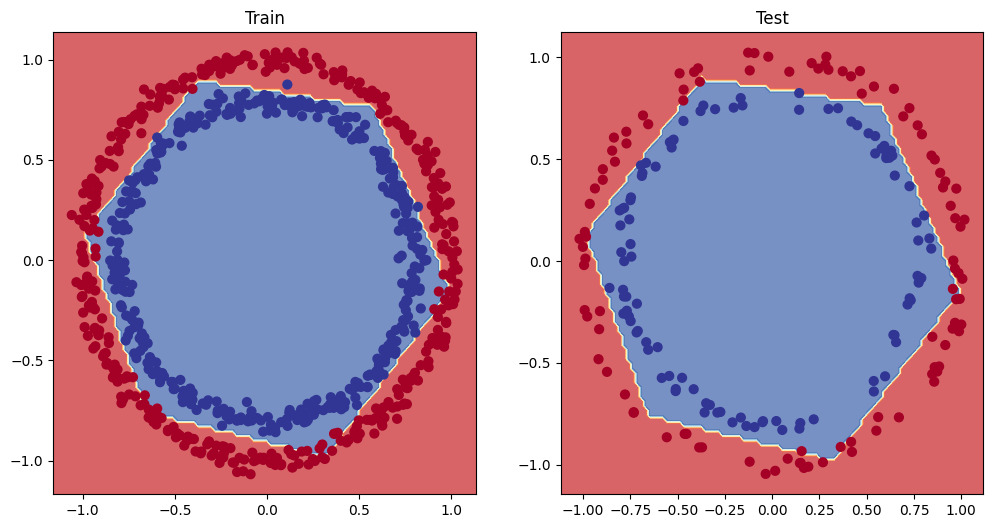

In [63]:
# plot performance
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X=X_test,y=y_test)
plt.show()

## How about a confusion matrix


In [75]:
from sklearn.metrics import confusion_matrix

# Make preds

y_preds = model_10.predict(X_test)

# Create a confusion matrix
confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 3ms/step


array([[97,  4],
       [ 1, 98]])

In [73]:
y_preds[:10]

array([[9.9128318e-01],
       [9.9281305e-01],
       [9.9281305e-01],
       [9.9281305e-01],
       [3.9067265e-02],
       [4.4437429e-01],
       [9.0010780e-01],
       [2.4173595e-02],
       [9.9141556e-01],
       [2.9715222e-05]], dtype=float32)

Oops looks like our predictions array has come out in **prediction probability** form... the standard output from sigmoid(or softmax)

In [76]:
from sklearn.metrics import confusion_matrix

# Make preds

y_preds = model_10.predict(X_test)

# Create a confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

7/7 [==============================] - 0s 2ms/step


array([[97,  4],
       [ 1, 98]])

## how about we prettify our confusion matrix?

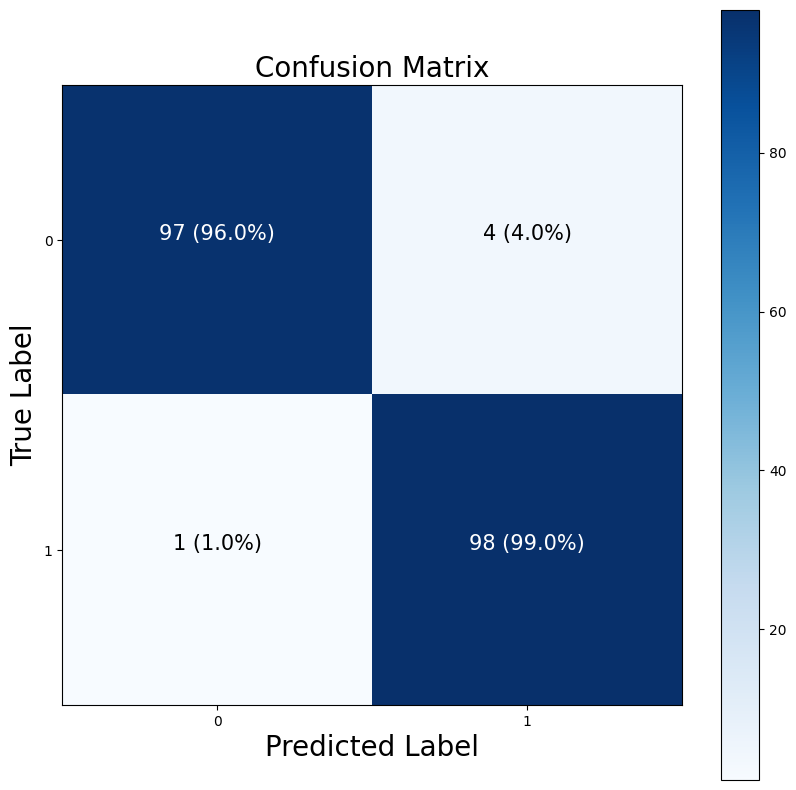

In [104]:
# Note: the matrix code we're about to write is a remix of scikitlearns confusion matrix
import itertools

figsize=(10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]  #normalize our confusion matrix

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = False

if classes:
  labels=classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",xlabel="Predicted Label",ylabel="True Label",
       xticks=np.arange(len(labels)),yticks=np.arange(len(labels)),xticklabels=labels,yticklabels=labels)

# set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# adjust the label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# set threshold for diff colours
threshold = (cm.max() + cm.min()) /2

# plot text in each cell

for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",color="white"
           if cm[i,j] > threshold else "black",size=15)

In [81]:
cm_norm

array([[0.96039604, 0.03960396],
       [0.01010101, 0.98989899]])

In [82]:
cm.shape[0]

2